## Pretrained word2vec

You can download Malaya pretrained without need to import malaya.

#### word2vec from news

[size-32](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v7/word2vec/word2vec-32.p)

[size-64](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v7/word2vec/word2vec-64.p)

[size-128](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v7/word2vec/word2vec-128.p)

[size-256](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v7/word2vec/word2vec-256.p)

[size-512](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v7/word2vec/word2vec-512.p)

#### word2vec from wikipedia

[size-256](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v13/word2vec/word2vec-wiki-nce-256.p)

You will get a pickle file, contains `['nce_weights', 'dictionary']`.

To load that pickle file,
```python
import pickle
with open('file.p', 'rb') as fopen:
    word2vec = pickle.load(fopen)
```

But If you don't know what to do with malaya word2vec, Malaya provided some useful functions for you!

In [1]:
%%time
import malaya
%matplotlib inline

CPU times: user 5.89 s, sys: 1.38 s, total: 7.27 s
Wall time: 11.5 s


## Load malaya news word2vec

In [4]:
embedded_news = malaya.wordvector.load_news(256)

## Load malaya wikipedia word2vec

In [6]:
embedded_wiki = malaya.wordvector.load_wiki()

## Load word vector interface

```python

def load(embed_matrix, dictionary):

    """
    Return malaya.wordvector._wordvector object.

    Parameters
    ----------
    embed_matrix: numpy array
    dictionary: dictionary

    Returns
    -------
    _wordvector: malaya.wordvector._wordvector object
    """
    
```

1. `embed_matrix` must be a 2d,

```python

array([[ 0.25      , -0.10816103, -0.19881412, ...,  0.40432587,
         0.19388093, -0.07062137],
       [ 0.3231817 , -0.01318745, -0.17950962, ...,  0.25      ,
         0.08444146, -0.11705721],
       [ 0.29103908, -0.16274083, -0.20255531, ...,  0.25      ,
         0.06253044, -0.16404966],
       ...,
       [ 0.21346697,  0.12686132, -0.4029543 , ...,  0.43466234,
         0.20910986, -0.32219803],
       [ 0.2372157 ,  0.32420087, -0.28036436, ...,  0.2894639 ,
         0.20745888, -0.30600077],
       [ 0.27907744,  0.35755727, -0.34932107, ...,  0.37472805,
         0.42045262, -0.21725406]], dtype=float32)
```

2. `dictionary`, a dictionary mapped `{'word': 0}`,

```python

{'mengembanfkan': 394623,
 'dipujanya': 234554,
 'comicolor': 182282,
 'immaz': 538660,
 'qabar': 585119,
 'phidippus': 180802,
}

```

#### Load custom word vector

Like fast-text, example, I download from here, https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.ms.vec

We need to parse the data to get `embed_matrix` and `dictionary`.

In [12]:
import io
import numpy as np

fin = io.open('wiki.ms.vec', 'r', encoding='utf-8', newline='\n', errors='ignore')
n, d = map(int, fin.readline().split())

data, vectors = {}, []
for no, line in enumerate(fin):
    tokens = line.rstrip().split(' ')
    data[tokens[0]] = no
    vectors.append(list(map(float, tokens[1:])))
    
vectors = np.array(vectors)

In [13]:
fast_text = malaya.wordvector.load(vectors, data)
word_vector_wiki = malaya.wordvector.load(embedded_wiki['nce_weights'], embedded_wiki['dictionary'])

W0908 23:24:56.546383 4481250752 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/wordvector.py:96: The name tf.InteractiveSession is deprecated. Please use tf.compat.v1.InteractiveSession instead.



## Check top-k similar semantics based on a word

In [15]:
word = 'anwar'
print("Embedding layer: 8 closest words to: '%s' using fast-text"%(word))
print(fast_text.n_closest(word=word, num_closest=8, metric='cosine'))

Embedding layer: 8 closest words to: 'anwar' using fast-text
[['anwari', 0.7751702635797655], ['anwa', 0.7415013831727038], ['anwardi', 0.6817634761631164], ['dhanwar', 0.6797479885269004], ['ibrahim', 0.633790291910495], ['sanwan', 0.5990863002536039], ['ibrahimi', 0.5783653188698719], ['ibrahimiah', 0.5573087618004475]]


In [16]:
word = 'anwar'
print("Embedding layer: 8 closest words to: '%s' using malaya wiki word2vec"%(word))
print(word_vector_wiki.n_closest(word=word, num_closest=8, metric='cosine'))

Embedding layer: 8 closest words to: 'anwar' using malaya wiki word2vec
[['zaid', 0.7285637855529785], ['khairy', 0.6839416027069092], ['zabidi', 0.6709405183792114], ['nizar', 0.6695379018783569], ['harussani', 0.6595045328140259], ['shahidan', 0.6565827131271362], ['azalina', 0.6541041135787964], ['shahrizat', 0.6538639068603516]]


## Check batch top-k similar semantics based on a word

In [18]:
words = ['anwar', 'mahathir']
fast_text.batch_n_closest(words, num_closest=8,
                                 return_similarity=False)

[['anwar',
  'anwari',
  'anwa',
  'anwardi',
  'dhanwar',
  'ibrahim',
  'sanwan',
  'ibrahimi'],
 ['mahathir',
  'mahathma',
  'athir',
  'mohamad',
  'dr',
  'najib',
  'fathir',
  'badawi']]

What happen if a word not in the dictionary?

You can set parameter `soft` to `True` or `False`. Default is `True`.

if `True`, a word not in the dictionary will be replaced with nearest JaroWrinkler ratio.

if `False`, it will throw an exception if a word not in the dictionary.

In [20]:
words = ['anwar', 'mahathir','husein-comel']
word_vector_wiki.batch_n_closest(words, num_closest=8,
                                 return_similarity=False,soft=False)

Exception: husein-comel not in dictionary, please use another word or set `soft` = True

In [21]:
words = ['anwar', 'mahathir','husein-comel']
word_vector_wiki.batch_n_closest(words, num_closest=8,
                                 return_similarity=False,soft=True)

[['anwar',
  'zaid',
  'khairy',
  'zabidi',
  'nizar',
  'harussani',
  'shahidan',
  'azalina'],
 ['mahathir',
  'zulkifli',
  'zambry',
  'anwar',
  'khairy',
  'mazlan',
  'megawati',
  'ramasamy'],
 ['husein',
  'hasbullah',
  'juned',
  'arsyad',
  'taqiyuddin',
  'achmad',
  'mansoor',
  'amru']]

## Calculate vb - va + vc

In [22]:
print(fast_text.analogy('anwar', 'penjara', 'kerajaan', 5))

['penjara', 'kerajaan', ',kerajaan', '#kerajaan', '\xa0kerajaan']


In [23]:
print(word_vector_wiki.analogy('anwar', 'penjara', 'kerajaan', 5))

['penjara', 'kerajaan', 'kemaharajaan', 'pemerintah', 'pelabuhan']


## Word2vec calculator

You can put any equation you wanted.

In [24]:
fast_text.calculator('anwar + amerika + mahathir', num_closest=8, metric='cosine',
                      return_similarity=False)

['mahathir',
 'anwar',
 'mohamad',
 'mahfodz',
 'athir',
 'anwari',
 'anwardi',
 'mahathma',
 'hishammudin']

In [25]:
word_vector_wiki.calculator('anwar + amerika + mahathir', num_closest=8, metric='cosine',
                      return_similarity=False)

['anwar',
 'mahathir',
 'hishammuddin',
 'sukarno',
 'khairy',
 'suffian',
 'ahmadinejad',
 'davutoglu',
 'shahrizat']

## Visualize scatter-plot

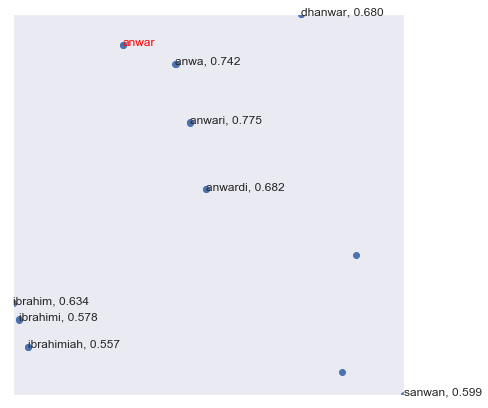

In [26]:
word = 'anwar'
result = fast_text.n_closest(word=word, num_closest=8, metric='cosine')
data = fast_text.scatter_plot(result, centre = word)

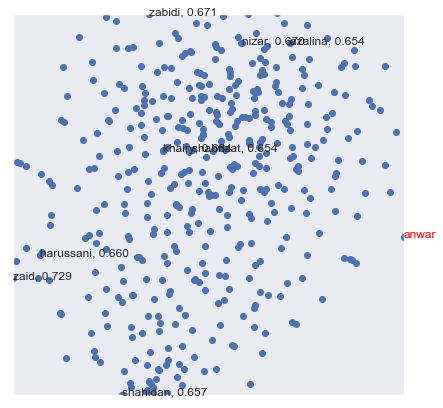

In [27]:
word = 'anwar'
result = word_vector_wiki.n_closest(word=word, num_closest=8, metric='cosine')
data = word_vector_wiki.scatter_plot(result, centre = word)

## Visualize tree-plot

<Figure size 504x504 with 0 Axes>

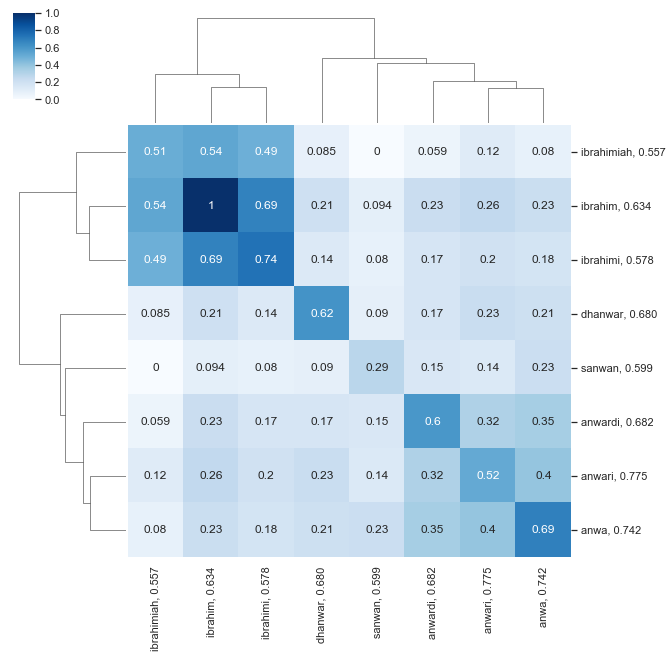

In [28]:
word = 'anwar'
result = fast_text.n_closest(word=word, num_closest=8, metric='cosine')
data = fast_text.tree_plot(result)

<Figure size 504x504 with 0 Axes>

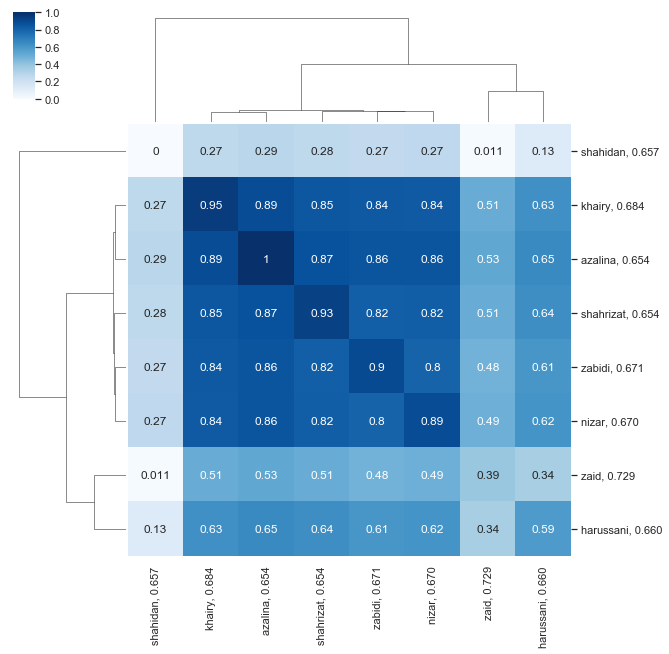

In [30]:
word = 'anwar'
result = word_vector_wiki.n_closest(word=word, num_closest=8, metric='cosine')
data = word_vector_wiki.tree_plot(result)

## Visualize social-network

```python

def network(
    self,
    word,
    num_closest = 8,
    depth = 4,
    min_distance = 0.5,
    iteration = 300,
    figsize = (15, 15),
    node_color = '#72bbd0',
    node_factor = 50,
):

    """
    plot a social network based on word given

    Parameters
    ----------
    word : str
        centre of social network.
    num_closest: int, (default=8)
        number of words closest to the node.
    depth: int, (default=4)
        depth of social network. More deeper more expensive to calculate, big^O(num_closest ** depth).
    min_distance: float, (default=0.5)
        minimum distance among nodes. Increase the value to increase the distance among nodes.
    iteration: int, (default=300)
        number of loops to train the social network to fit min_distace.
    figsize: tuple, (default=(15, 15))
        figure size for plot.
    node_color: str, (default='#72bbd0')
        color for nodes.
    node_factor: int, (default=10)
        size factor for depth nodes. Increase this value will increase nodes sizes based on depth.
        
```

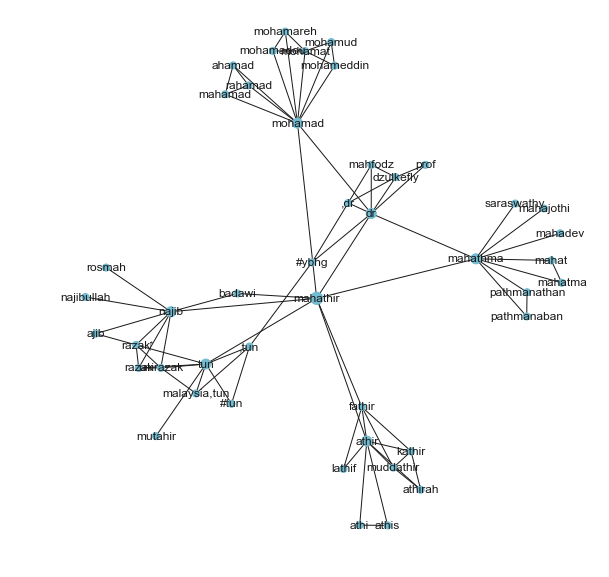

In [31]:
g = fast_text.network('mahathir', figsize = (10, 10), node_factor = 50, depth = 3)

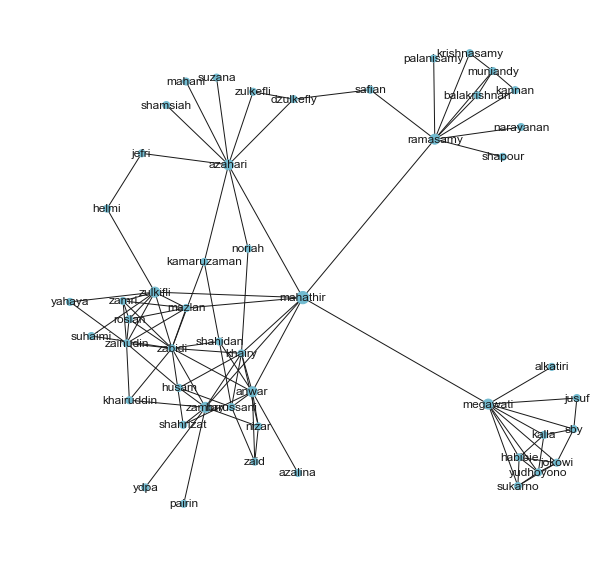

In [32]:
g = word_vector_wiki.network('mahathir', figsize = (10, 10), node_factor = 50, depth = 3)

## Get embedding from a word

If a word not found in the vocabulary, it will throw an exception with top-5 nearest words

In [ ]:
word_vector_wiki.get_vector_by_name('husein-comel')